# Uber Supply-Demand Gap

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of analysis, we can find the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.  

In [215]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #ploting 
import seaborn as sns            #ploting 
sns.set_style("whitegrid")


In [193]:
#Loading data
uber = pd.read_csv("Uber Request Data.csv")

### Cleaning the data

In [194]:
uber.shape

(6745, 6)

In [195]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [196]:
#finding nulls in data
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [197]:
#records without Trip completed
uber[uber.Status != "Trip Completed"].Status.count()

3914

Its exactly 3914, which is equal to nulls in Drop timestamp 3914. So, need not to bother as it is doesn't have any droptime and can replace them with 0's
And driver id is not important we can just drop the column

In [198]:
#filling na's with 0

uber["Drop timestamp"] = uber["Drop timestamp"].fillna(0)

uber  = uber.drop(['Driver id'],axis = 1)


In [199]:
#checking NA's
uber.isnull().sum()

Request id           0
Pickup point         0
Status               0
Request timestamp    0
Drop timestamp       0
dtype: int64

As the data is fully cleaned, we can get into Analysis

### Analysis

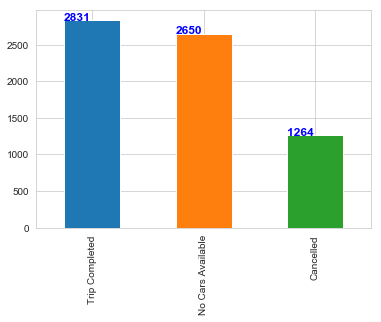

In [200]:
# simple density plot
fig, ax = plt.subplots()
uber['Status'].value_counts().plot(ax=ax, kind='bar')

for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()),color='b', weight='bold', ha='left', va='baseline', size=12)
#for i, v in enumerate(uber['Status']):
#    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

The combination of No cars availble(2650) and cancelled(1264) is 3914 which is more than trips completed(2831). 
This shows a significant under-supply to meet the demand for taxi.

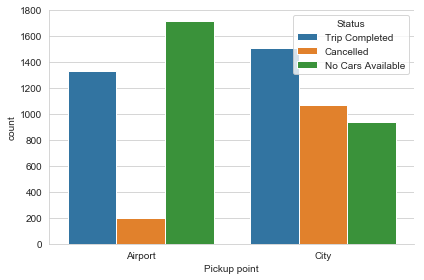

In [201]:
#overall trips 
sns.countplot(x= 'Pickup point',hue = 'Status',data = uber)
sns.despine()
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

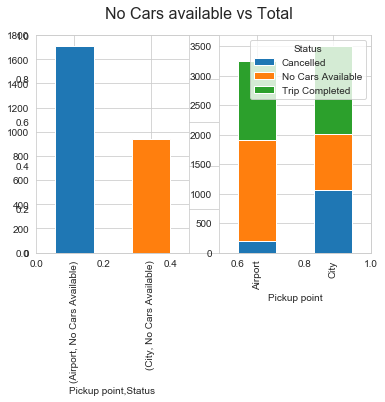

In [202]:
#No Availability vs Total of cars from City to Airport & Airport to City

fig = plt.figure()
fig, ax = plt.subplots()
fig.suptitle('No Cars available vs Total',fontsize=16)
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)


uber[uber.Status == "No Cars Available"].groupby('Pickup point').Status.value_counts().plot(ax=ax, kind='bar')
#uber[uber.Status == "Trip Completed"].groupby('Pickup point').Status.value_counts().plot(ax=ax1, kind='bar')
uber.groupby(['Pickup point','Status']).size().unstack().plot(ax=ax1, kind='bar',stacked = True)




A further drill down shows that the non availability of cars is more at the Airport relative to the city.


<Figure size 432x288 with 0 Axes>

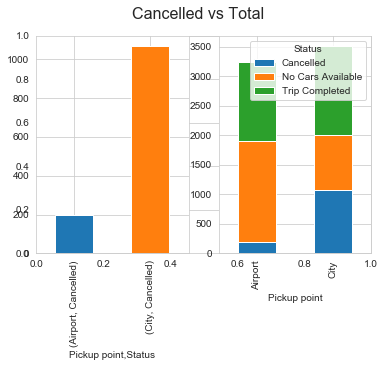

In [203]:
#Cancelled flights from City to Airport & Airport to City

fig = plt.figure()
fig, ax = plt.subplots()
fig.suptitle('Cancelled vs Total',fontsize=16)
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)


uber[uber.Status == "Cancelled"].groupby('Pickup point').Status.value_counts().plot(ax=ax, kind='bar')
#uber[uber.Status == "Trip Completed"].groupby('Pickup point').Status.value_counts().plot(ax=ax1, kind='bar')
uber.groupby(['Pickup point','Status']).size().unstack().plot(ax=ax1, kind='bar',stacked = True)



The cancelled trips data shows that more trips are cancelled in the city compared to Aiport.



In [204]:
#Preparing Time slots

uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'])

uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'])

uber["Request hour"] = uber['Request timestamp'].dt.hour


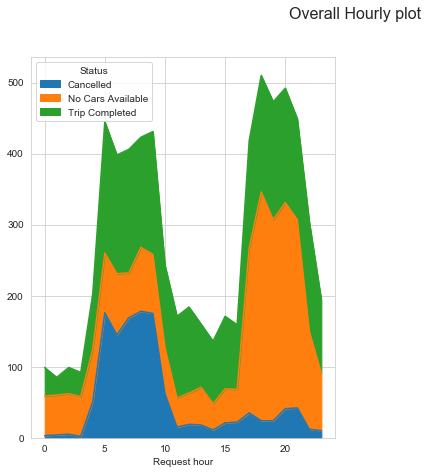

In [205]:
#Hourly visualization of total trips
fig = plt.figure(1,figsize=(12,7))
fig.suptitle('Overall Hourly plot',fontsize=16)


ax = fig.add_subplot(121)

uber.groupby(['Request hour','Status']).size().unstack().plot(ax=ax, kind='area',stacked = True)




In overall trips, thers is high demand in mornings and evenings and a high unmet demand becoz of cancellations and non-availability both mornings and evenings


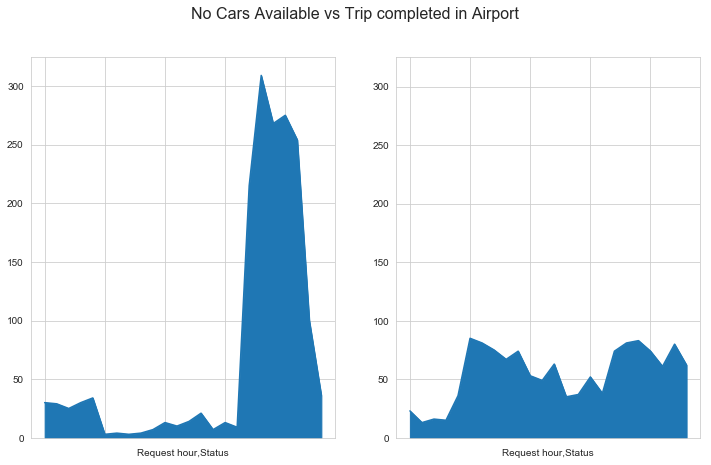

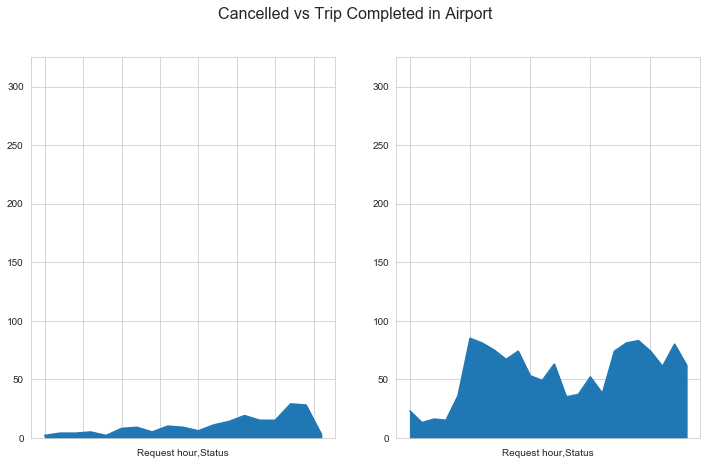

In [206]:

#Hourly visualization from AIrport to City

fig = plt.figure(1,figsize=(12,7))
fig.suptitle('No Cars Available vs Trip completed in Airport',fontsize=16)

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax1.set_ylim([0,325])


uber[(uber.Status == "No Cars Available") & (uber["Pickup point"] == "Airport")].groupby('Request hour').Status.value_counts().plot(ax=ax, kind='area')
uber[(uber.Status == "Trip Completed") & (uber["Pickup point"] == "Airport")].groupby('Request hour').Status.value_counts().plot(ax=ax1, kind='area')


fig = plt.figure(2,figsize=(12,7))
fig.suptitle('Cancelled vs Trip Completed in Airport',fontsize=16)

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax1.set_ylim([0,325])
ax.set_ylim([0,325])

uber[(uber.Status == "Cancelled") & (uber["Pickup point"] == "Airport")].groupby('Request hour').Status.value_counts().plot(ax=ax, kind='area')
uber[(uber.Status == "Trip Completed") & (uber["Pickup point"] == "Airport")].groupby('Request hour').Status.value_counts().plot(ax=ax1, kind='area')



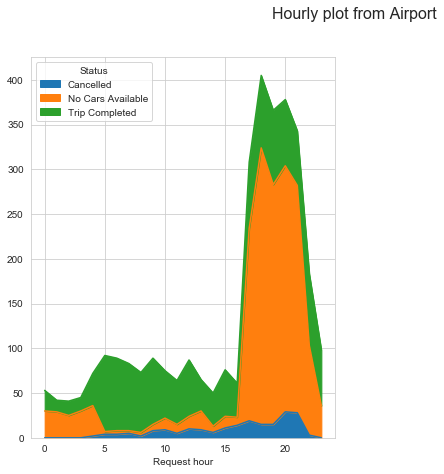

In [207]:
#Hourly visualization of total trips
fig = plt.figure(1,figsize=(12,7))
fig.suptitle('Hourly plot from Airport',fontsize=16)


ax = fig.add_subplot(121)

uber[uber["Pickup point"] == "Airport"].groupby(['Request hour','Status']).size().unstack().plot(ax=ax, kind='area',stacked = True)



There are more non availability of Taxis in Airport in Evenings 
Trips completed and cancelled are same at all times, it clearly shows a high demand in evenings in Airport
The supply is almost same in all time slots


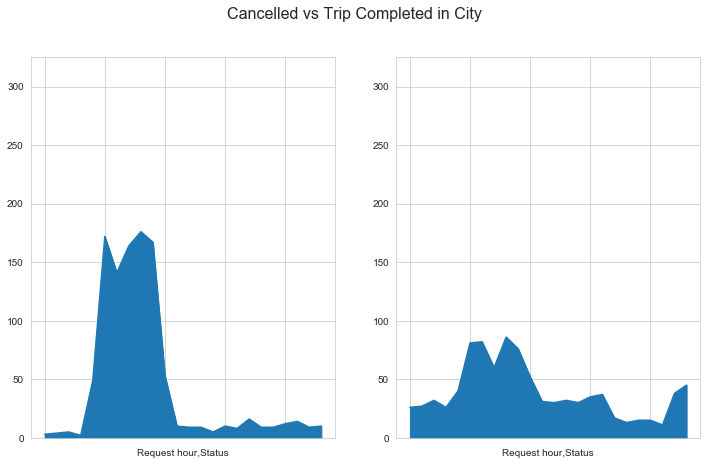

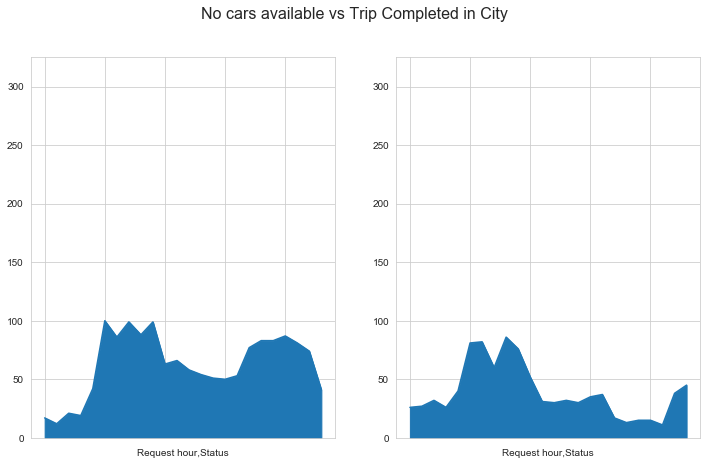

In [208]:
#Hourly visualization from City to Airport

fig = plt.figure(1,figsize=(12,7))
fig.suptitle('Cancelled vs Trip Completed in City',fontsize=16)

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.set_ylim([0,325])
ax1.set_ylim([0,325])


uber[(uber.Status == "Cancelled") & (uber["Pickup point"] == "City")].groupby('Request hour').Status.value_counts().plot(ax=ax, kind='area')
uber[(uber.Status == "No Cars Available") & (uber["Pickup point"] == "City")].groupby('Request hour').Status.value_counts().plot(ax=ax1, kind='area')

fig = plt.figure(2,figsize=(12,7))
fig.suptitle('No cars available vs Trip Completed in City',fontsize=16)

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.set_ylim([0,325])
ax1.set_ylim([0,325])

uber[(uber.Status == "Trip Completed") & (uber["Pickup point"] == "City")].groupby('Request hour').Status.value_counts().plot(ax=ax, kind='area')
uber[(uber.Status == "No Cars Available") & (uber["Pickup point"] == "City")].groupby('Request hour').Status.value_counts().plot(ax=ax1, kind='area')



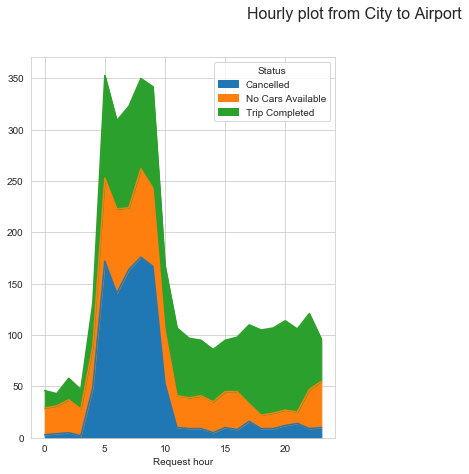

In [209]:
#Hourly visualization of total trips
fig = plt.figure(1,figsize=(12,7))
fig.suptitle('Hourly plot from City to Airport',fontsize=16)


ax = fig.add_subplot(121)

uber[uber["Pickup point"] == "City"].groupby(['Request hour','Status']).size().unstack().plot(ax=ax, kind='area',stacked = True)


There are more cancellations and non availability of cars in mornings from From City to Airport, it means more demand in the mornings to go to Airport. 
The supply is almost same in all time slots


In [210]:
#slot wise (i.e, From early morning to night)
early = uber[(uber["Request hour"] >= 0) & (uber["Request hour"] < 4)]["Request id"]
uber.loc[early.index, 'slot'] = "Nights"

morning = uber[(uber["Request hour"] >= 4) & (uber["Request hour"] < 8)]["Request id"]
uber.loc[morning.index, 'slot'] = "Early Mornings"

noon = uber[(uber["Request hour"] >= 8) & (uber["Request hour"] < 12)]["Request id"]
uber.loc[noon.index, 'slot'] = "Mornings"

eve = uber[(uber["Request hour"] >= 12) & (uber["Request hour"] < 16)]["Request id"]
uber.loc[eve.index, 'slot'] = "Noon"

early = uber[(uber["Request hour"] >=16 ) & (uber["Request hour"] < 20)]["Request id"]
uber.loc[early.index, 'slot'] = "Evenings"

morning = uber[(uber["Request hour"] >= 20) & (uber["Request hour"] <= 23)]["Request id"]
uber.loc[morning.index, 'slot'] = "Late Evenings"


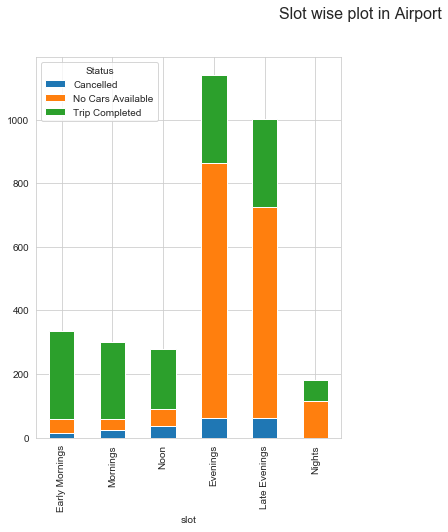

In [211]:
#Slot wise ploting
fig = plt.figure(1,figsize=(12,7))
fig.suptitle('Slot wise plot in Airport',fontsize=16)


ax = fig.add_subplot(121)
day_order = ["Early Mornings","Mornings", "Noon", "Evenings", "Late Evenings", "Nights"]

uber[uber["Pickup point"] == "Airport"].groupby(['slot','Status']).size().unstack().loc[day_order].plot(ax=ax, kind='bar',stacked = True)



There are more non availability of Taxis in Airport in Evenings 
Trips completed and cancelled are same at all times, it clearly shows a high demand in evenings in Airport.
The supply is almost same in all time slots


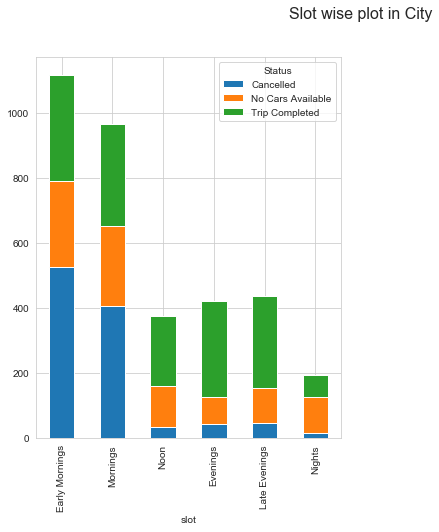

In [212]:
#Slot wise ploting
fig = plt.figure(1,figsize=(12,7))
fig.suptitle('Slot wise plot in City',fontsize=16)


ax = fig.add_subplot(121)
day_order = ["Early Mornings","Mornings", "Noon", "Evenings", "Late Evenings", "Nights"]

uber[uber["Pickup point"] == "City"].groupby(['slot','Status']).size().unstack().loc[day_order].plot(ax=ax, kind='bar',stacked = True)



There are more cancellations and non availability of cars in mornings From City to Airport, it means more demand in the mornings to go to Airport

#### From Airport
There are more non availability of Taxis in Airport in Evenings which means a huge unmet demand of Taxis in Airport in Evenings
It may be because of more Arrival flights in this time 
And it can be addressed by Uber by providing More Number of taxis in Airport in the evenings in between 4pm – 11pm



#### To Airport
There are more cancellations and non availability of cars in mornings From City to Airport, it means more demand in the mornings to go to Airport. 
The more cancellations from city in morning hours also shows means drivers are not interested to go Airports in this slot as they might afraid of not getting return trip from airport
It may be because of more departures in this time. This can be addressed by uber by providing Special Airport Taxis from city to Airport in mornings 